# Проект: Обучение с учителем: качество модели

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Как решать задачу**

Продумывать подход к решению этой задачи вам не придётся — руководитель отдела его уже сформировал:

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2. Нужно собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.

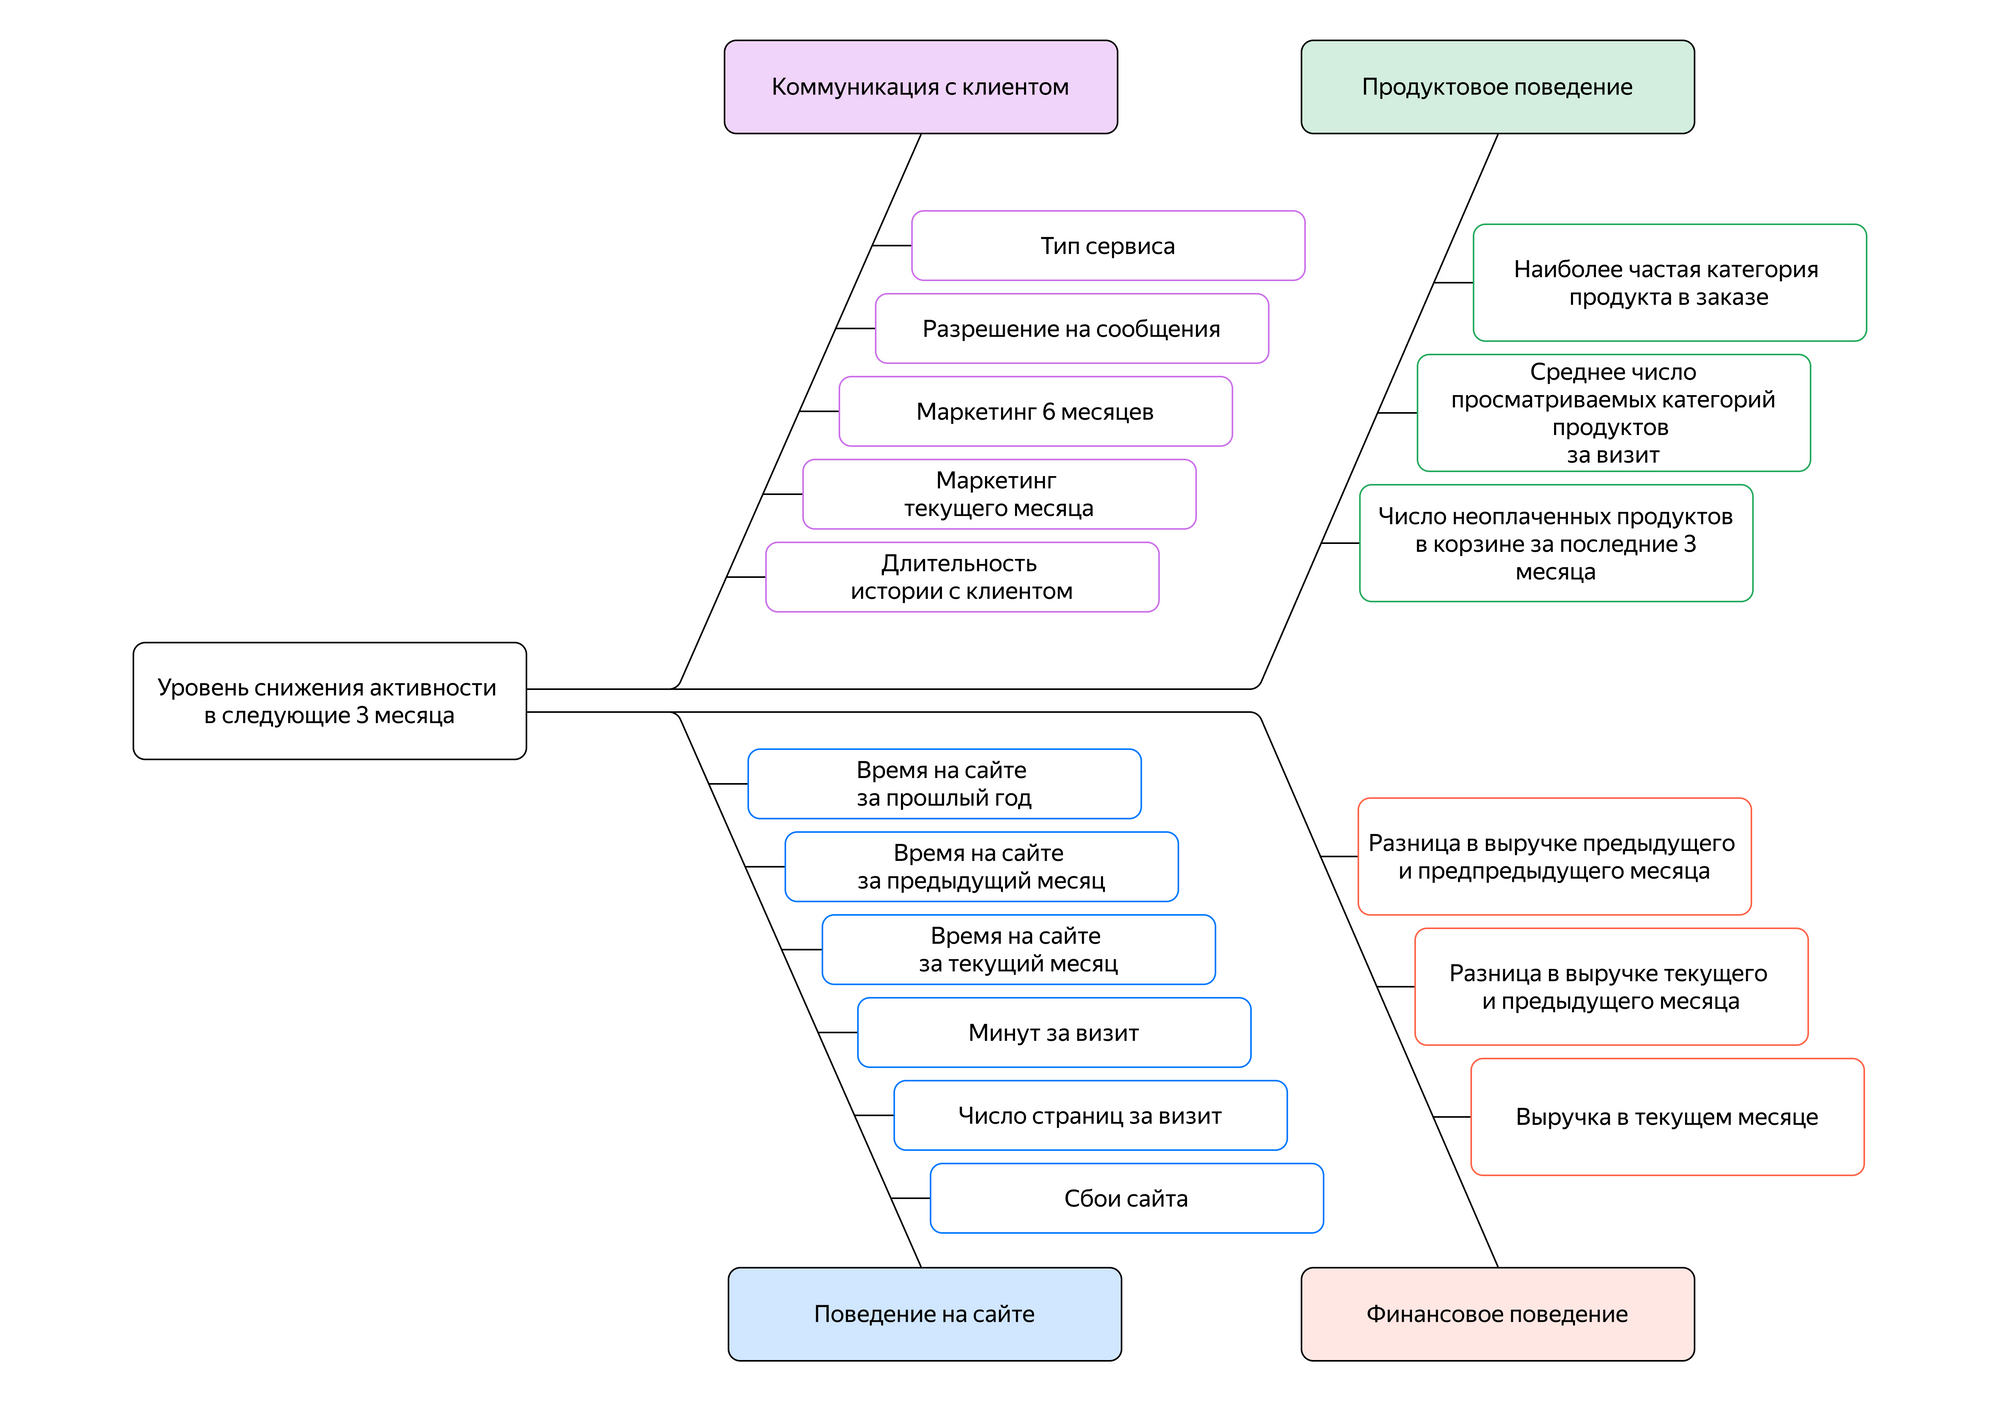

1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Руководство одобрило описание решения, и вам, как специалисту по DS, нужно его реализовать.

**Описание данных**

`market_file.csv`

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

`market_money.csv`

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

`market_time.csv`

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

`money.csv`

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

**Импорт библиотек**

In [1]:
!pip install --upgrade scikit-learn -q
!pip install phik -q
!pip install shap -q


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import shap
import phik

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

# класс для работы с пропусками
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    recall_score, 
    precision_score, 
    confusion_matrix, 
    accuracy_score,
    mean_absolute_error,
    r2_score,
    mean_squared_error,
    roc_auc_score
)

from sklearn.pipeline import Pipeline

from phik.report import plot_correlation_matrix

from sklearn.feature_selection import SelectKBest, f_classif

## Загрузка данных

In [3]:
try:
    market = pd.read_csv('/datasets/market_file.csv')
except:    
    market = pd.read_csv('D:/Данные/market_file.csv')

try:
    revenue = pd.read_csv('/datasets/market_money.csv')
except:    
    revenue = pd.read_csv('D:/Данные/market_money.csv')

try:
    time = pd.read_csv('/datasets/market_time.csv')
except:    
    time = pd.read_csv('D:/Данные/market_time.csv')
    
try:
    profit_month = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')
except:    
    profit_month = pd.read_csv('D:/Данные/money.csv', sep=';', decimal = ',')    

for n in [market, revenue, time, profit_month]:
    display(n.head(3))
    display(n.tail(3))
    display(n.info())        

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7
1299,216647,Прежний уровень,премиум,да,4.0,5,906,0.94,Техника для красоты и здоровья,4,5,3,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


,id,Период,Выручка
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0
3899,216647,текущий_месяц,4448.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10


,id,Период,минут
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10
2599,216647,предыдцщий_месяц,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


,id,Прибыль
1297,216645,3.29
1298,216646,4.03
1299,216647,3.28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

### Промежуточный вывод

После записи датасета в переменные `market`, `revenue`, `time`, `profit_month` и первичного знакомства с данными видим:
данные в таблицах соответствуют описанию. 

Датафрейм `market` с данными о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении, содержит 13 столбцов и 1300 строк. Пропусков нет. Встречаются типы данных: целочисленный, строковый, вещественный.

Датафрейм `revenue` с данными о выручке, которую получает магазин с покупателя, содержит 3 столбца и 3900 строк. Пропусков нет. Встречаются типы данных: целочисленный, строковый, вещественный.

Датафрейм `revenue` с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода, содержит 3 столбца и 2600 строк. Пропусков нет. Встречаются типы данных: целочисленный, строковый. Ошибка в написании "предыдцщий_месяц" в колонке "Период".

Датафрейм `profit_month` с данными о среднемесячной прибыли покупателя за последние 3 месяца, содержит 2 столбца и 1300 строк. Пропусков нет. Встречаются типы данных: целочисленный, вещественный. Ошибка в написании "предыдцщий_месяц" в колонке "Период".
Для считывания запятой в разделителе цифр и точки с запятой в разделителе слов, определены параметры: "sep" и "decimal".

Названия колонок содержат заглавную букву в начале и пробелы. На следующем шаге необходимо преобразовать названия столбцов в "змеиный" регистр.

## Предобработка данных

### Преобразование наименований столбцов

In [4]:
for n in [market, revenue, time, profit_month]:
    n.columns = [col.lower().replace(' ', '_') for col in n.columns]
    display(n.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Index(['id', 'период', 'выручка'], dtype='object')

Index(['id', 'период', 'минут'], dtype='object')

Index(['id', 'прибыль'], dtype='object')

### Удаление дубликатов

In [5]:
for n in [market, revenue, time, profit_month]:
    display(f'Кол-во дубликатов {n.duplicated().sum()}')


'Кол-во дубликатов 0'

'Кол-во дубликатов 0'

'Кол-во дубликатов 0'

'Кол-во дубликатов 0'

### Обработка неявных дубликатов

In [6]:
def func(list_col, data):
    for col_l in list_col:
        print('-'* 50)
        print(col_l, data[col_l].sort_values().unique())    

for n in [market, revenue, time, profit_month]:        
    func(n.select_dtypes(exclude='number').columns.tolist(), n)
 

--------------------------------------------------
покупательская_активность ['Прежний уровень' 'Снизилась']
--------------------------------------------------
тип_сервиса ['премиум' 'стандарт' 'стандартт']
--------------------------------------------------
разрешить_сообщать ['да' 'нет']
--------------------------------------------------
популярная_категория ['Домашний текстиль' 'Косметика и аксесуары' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника' 'Техника для красоты и здоровья'
 'Товары для детей']
--------------------------------------------------
период ['предыдущий_месяц' 'препредыдущий_месяц' 'текущий_месяц']
--------------------------------------------------
период ['предыдцщий_месяц' 'текущий_месяц']


- В датафрейме `market`: 
     - исправим ошибку в написании 'стандартт' в колонке 'тип_сервиса',
- В датафрейме `time`: 
     - исправим ошибку в написании 'предыдцщий_месяц' в колонке 'период'

In [7]:
market['тип_сервиса'] = market['тип_сервиса'].replace('стандартт', 'стандарт')
time['период'] = time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')


Проверим на возможную ошибку в написании 'препредыдущий_месяц' вместо 'предыдущий_месяц' в датафрейме `revenue` в колонке 'период'.

In [8]:
for n in [revenue, time]:    
    display(n['период'].value_counts())
    display(n.groupby('id').agg(total_count=('период', 'count')).min())


предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: период, dtype: int64

total_count    3
dtype: int64

предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

total_count    2
dtype: int64

Вывод: в датафрейме с данными о выручке содержатся данные за 3 месяца, включая позапрошлый период, в датафрейме о времени на сайте содержатся данные за 2 месяца: текущий и прошлый.

### Преобразование типов данных


In [9]:
for n in [market, revenue, time, profit_month]:        
    int64 = n.select_dtypes(include=['int64']).columns.tolist()
    float64 = n.select_dtypes(include=['float64']).columns.tolist()
    n[int64] = n[int64].astype('int32')
    n[float64] = n[float64].astype('float32')

#проверка    
for n in [market, revenue, time, profit_month]:
    display(n.select_dtypes(include='number').dtypes)   


id                                       int32
маркет_актив_6_мес                     float32
маркет_актив_тек_мес                     int32
длительность                             int32
акционные_покупки                      float32
средний_просмотр_категорий_за_визит      int32
неоплаченные_продукты_штук_квартал       int32
ошибка_сервиса                           int32
страниц_за_визит                         int32
dtype: object

id           int32
выручка    float32
dtype: object

id       int32
минут    int32
dtype: object

id           int32
прибыль    float32
dtype: object

### Промежуточный вывод


- Преобразованы названия столбцов в "змеиный" регистр.
- Явные дубликаты не обнаружены.
- Обработаны неявные дубликаты в столбце 'тип_сервиса' датафрейма "market" и колонке 'тип_сервиса' в датафрейме time.
- В датафрейме с данными о выручке содержатся данные за 3 месяца, включая позапрошлый период, в датафрейме о времени на сайте содержатся данные за 2 месяца: текущий и прошлый.
- В целях экономии памяти преобразованы столбцы с типом float64 во float32, с типом int64 в int32.

## Исследовательский анализ данных

**Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении**

датафрейм `market`

<Figure size 432x288 with 0 Axes>

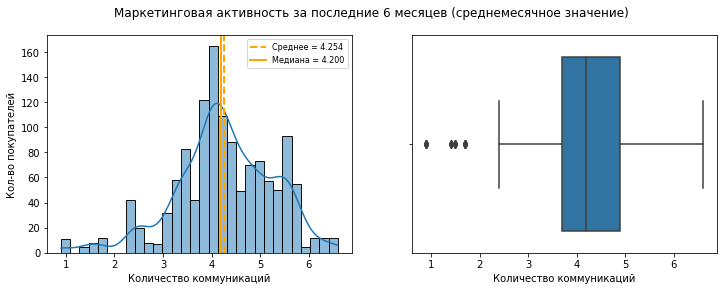

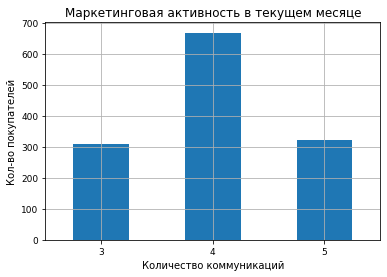

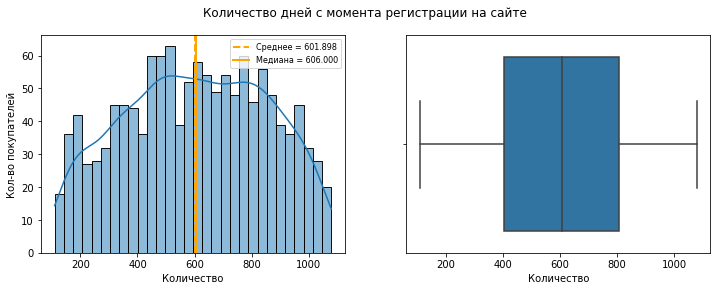

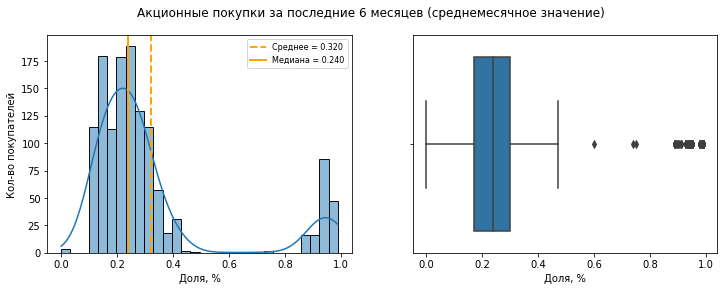

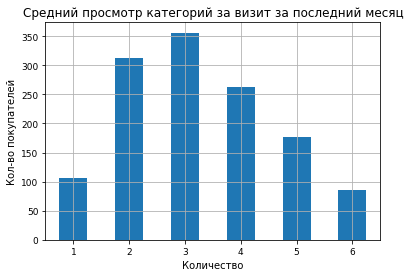

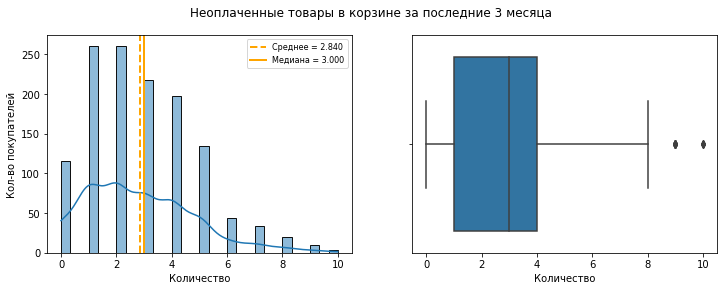

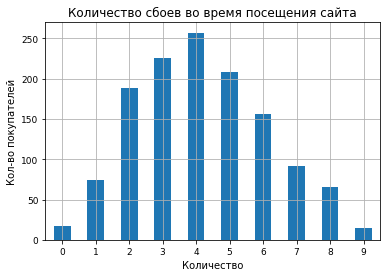

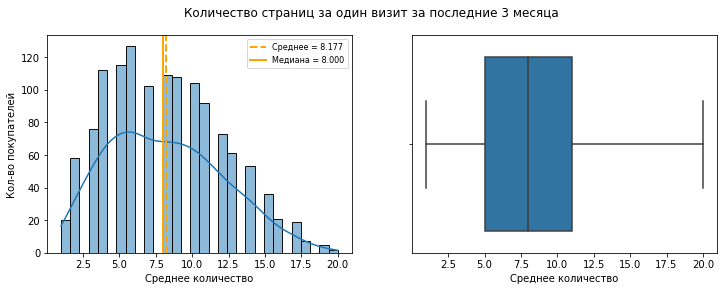

In [10]:
dataframe = market

for i, col in enumerate(dataframe[dataframe.drop('id', axis=1).select_dtypes(include='number').columns.tolist()]):

    x_label = ('Среднее количество' if col in ['страниц_за_визит'] 
         else 'Количество коммуникаций' if col in ['маркет_актив_тек_мес', 'маркет_актив_6_мес'] 
        else 'Доля, %' if col in ['акционные_покупки']  
               else 'Количество') 
    title_name = ('Маркетинговая активность за последние 6 месяцев (среднемесячное значение)' if col in ['маркет_актив_6_мес'] 
         else 'Маркетинговая активность в текущем месяце' if col in ['маркет_актив_тек_мес'] 
        else 'Количество дней с момента регистрации на сайте' if col in ['длительность'] 
         else 'Акционные покупки за последние 6 месяцев (среднемесячное значение)' if col in ['акционные_покупки'] 
         else 'Неоплаченные товары в корзине за последние 3 месяца' if col in ['неоплаченные_продукты_штук_квартал']  
         else 'Количество сбоев во время посещения сайта' if col in ['ошибка_сервиса']  
         else 'Количество страниц за один визит за последние 3 месяца' if col in ['страниц_за_визит']  
         else 'Средний просмотр категорий за визит за последний месяц' if col in ['средний_просмотр_категорий_за_визит']  

         else col[0].upper() + col[1:].lower())
    
    mean_value = dataframe[col].mean()
    median_value = dataframe[col].median()
    
    plt.figure(i)
    
    if len(dataframe[col].unique()) <= 10: 
        ax = (dataframe
          .groupby(col)
          .agg(cnt=('id', 'count'))
          .reset_index()
          .sort_values(by=col)
          .plot.bar(x=col, y='cnt', title=title_name, 
                  rot=0, grid=True, figsize=(6, 4), fontsize=9, xlabel=x_label, ylabel='Кол-во покупателей', legend=False)); 

           
    else: 
        fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (12,4))

        sns.histplot(data = dataframe, x = dataframe[col], ax=axs[0], kde=True, bins = 30, legend=True);
        axs[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(mean_value))
        axs[0].axvline(median_value, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Медиана = {:.3f}'.format(median_value))
        axs[0].set_xlabel(x_label)
        axs[0].set_ylabel('Кол-во покупателей')
        axs[0].legend(fontsize="8")

        sns.boxplot(data = dataframe, x = dataframe[col], ax=axs[1]);
        axs[1].set_xlabel(x_label)
        fig.suptitle(title_name)    
    

<Figure size 432x288 with 0 Axes>

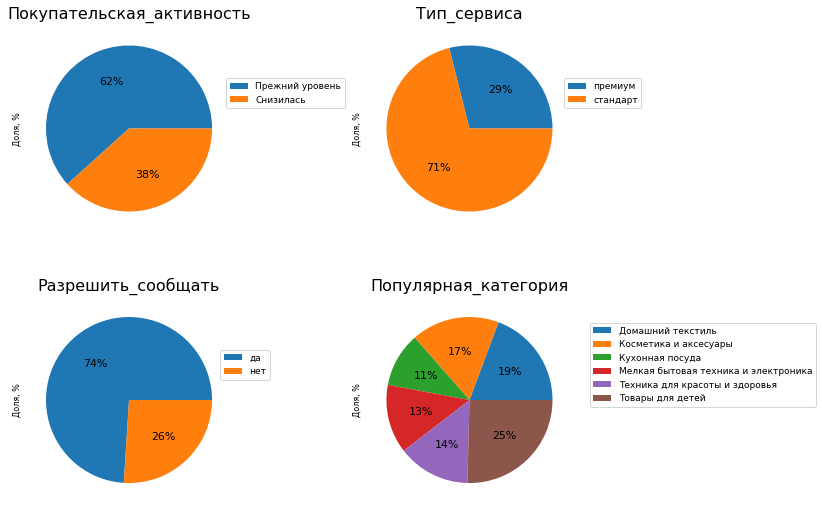

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
df1 = market[market.drop('id', axis=1).select_dtypes(exclude='number').columns.tolist()]


for i, col in enumerate(df1):
    plt.figure(i)
    
    x = (0 if i < 2 else 1) 
    y = (i-2 if i > 1 else i) 
    
    dataframe =df1.groupby(col).agg(prop=(col, 'count'))
    axes[x, y].pie(dataframe['prop'], autopct='%1.0f%%', textprops={'fontsize': 11})
    axes[x, y].set_ylabel('Доля, %', fontsize=8)
    axes[x, y].set_title(col[0].upper() + col[1:].lower(), fontsize=16)
    fig.tight_layout(pad=1)
    
    anchor_value = 1.2 + 0.03 * (len(max(dataframe.index.to_list(), key=len))  - 3)

    axes[x, y].legend(dataframe.reset_index()[col].unique(), \
                      loc=5, bbox_to_anchor=(anchor_value, 0.67), fontsize=9)
    
plt.show()


`Маркетинговая активность за последние 6 месяцев`
- Есть выбросы: кол-во коммуникаций менее 2,3.
- Распределение ассиметричное.
- В среднем 4,2 коммуникации на покупателя.

`Маркетинговая активность в текущем месяце`
- От 3 до 5 отправленных коммуникаций .
- В среднем 4 коммуникации на покупателя.

`Кол-во дней с момента регистрации на сайте`
- Нет выбросов.
- Распределение умеренно ассиметричное.
- В среднем 606 дней.

`Акционные покупки за последние 6 месяцев`
- Есть выбросы: клиенты, у которых доля покупок по акции от 0,45.
- Распределение ассиметричное.
- Среднее и медина сильно различаются из-за выделяющегося сегмента клиентов, делающих преимущественно покупки по акции: 0,24 против 0,32 .

`Средний просмотр категорий за визит за последний месяц`
- От 1 до 6  категорий.
- В среднем 3.

`Неоплаченные товары в корзине за последние 3 месяца`
- От 1 до 10  товаров.
- Есть выбросы: кол-во товаров от 8 и выше.
- Распределение ассиметричное.
- В среднем 3.

`Кол-во сбоев во время посещения сайта`
- Нет выбросов.
- От 0 до 9 .
- Распределение близко к нормальному.
- В среднем 4.

`Кол-во страниц за один визит за последние 3 месяца`
- Нет выбросов.
- Распределение умеренно ассиметричное.
- В среднем 8.

- Распределение покупательской активности: 62 на 38 %% в пользу прежнего уровня.
- Тип сервиса: 71% - стандарт, 29 % - премиум.
- Есть разрешение коммуницировать у 74 % покупателей.
- Самая популярная категория - "товары для детей", наименее популярная - "кухонная посуда".

**Данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.**

датафрейм `revenue`

In [12]:
def feature_distribution (dataframe):
    
    tit= dataframe.drop('id', axis=1).select_dtypes(include='number').columns.tolist()  
    tit= ''.join(tit)
    for i, col in enumerate(dataframe[dataframe.drop('id', axis=1).select_dtypes(include='number').columns.tolist()]):

        mean_value = dataframe[col].mean()
        median_value = dataframe[col].median()

        plt.figure(i)

        fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (16,5))

        sns.histplot(data = dataframe, x = dataframe[col], ax=axs[0], kde=True, bins = 10, multiple="dodge", hue=dataframe['период'], legend=True)

        axs[0].set_xlabel('Сумма ' + tit)
        axs[0].set_ylabel('Кол-во покупателей')

        sns.boxplot(data = dataframe, x = dataframe[col], ax=axs[1])
        axs[1].set_xlabel('Сумма ' + tit)
        fig.suptitle(col[0].upper() + col[1:].lower())    
    

<Figure size 432x288 with 0 Axes>

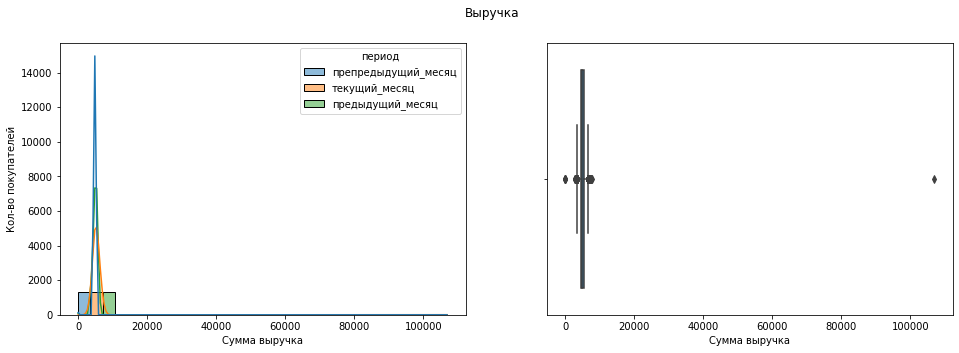

In [13]:
feature_distribution(revenue)


Выброс  - выручка более 100 тыс.
Отрисуем распределение без него и без данных клиентов, у которых не было покупок в период.

,медиана
период,
предыдущий_месяц,5005.000000
препредыдущий_месяц,4809.000000
текущий_месяц,5179.950195


<Figure size 432x288 with 0 Axes>

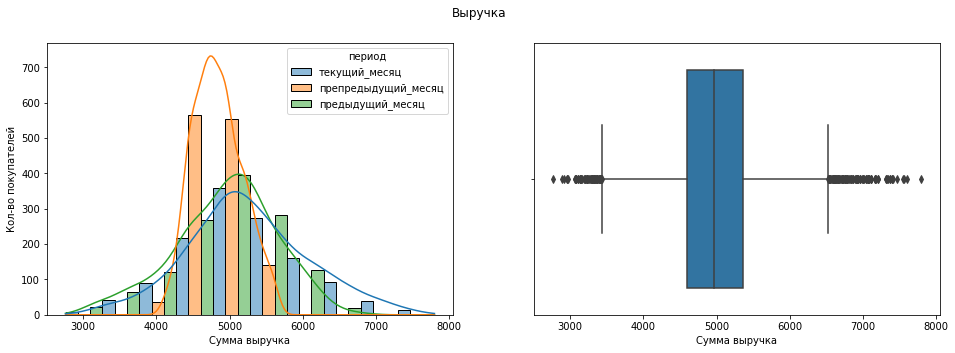

In [14]:
feature_distribution(revenue.query('0 < выручка < 20000'))
display(revenue.groupby('период').agg(медиана=('выручка', 'median')))

- Есть выбросы: значение выручки ниже 3,4 и выше 6,5.
- Распределение ассиметричное.
- В среднем выручка в текущем месяце равна 5180, в прошлом месяце - 5005, в предпредыдущем месяце - 4809.

**Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.**

датафрейм `time`

,медиана
период,
предыдущий_месяц,13
текущий_месяц,13


<Figure size 432x288 with 0 Axes>

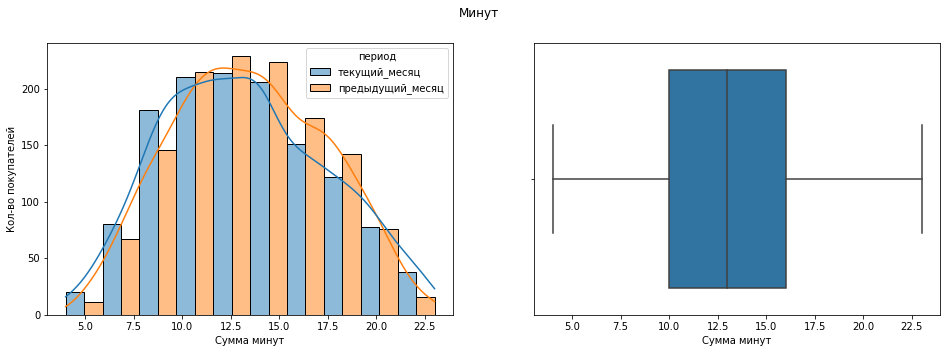

In [15]:
feature_distribution(time)
display(time.groupby('период').agg(медиана=('минут', 'median')))

- Выбросов нет.
- Распределение умеренно ассиметричное, стремящееся к нормальному.
- Среднее количество минут за период - 13.

**Данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.**

датафрейм `profit_month`

Text(0.5, 0.98, 'Прибыль')

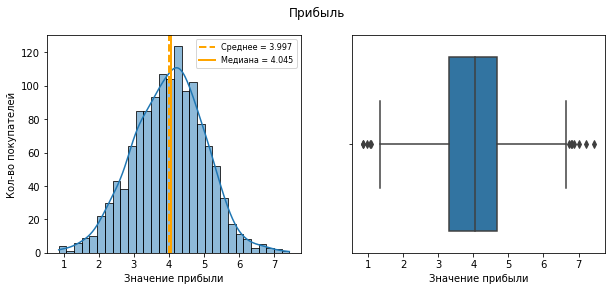

In [16]:
dataframe = profit_month
col = 'прибыль'

mean_value = dataframe[col].mean()
median_value = dataframe[col].median()
        
fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (10,4))
    
sns.histplot(data = dataframe, x = dataframe[col], ax=axs[0], kde=True, bins = 30, legend=True)
axs[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(mean_value))
axs[0].axvline(median_value, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Медиана = {:.3f}'.format(median_value))
axs[0].set_xlabel('Значение прибыли')
axs[0].set_ylabel('Кол-во покупателей')
axs[0].legend(fontsize="8")

sns.boxplot(data = dataframe, x = dataframe[col], ax=axs[1])
axs[1].set_xlabel('Значение прибыли')
fig.suptitle(col[0].upper() + col[1:].lower())    
    

- Есть выбросы: значение прибыли ниже 1,3 и выше 6,7.
- Распределение стремится к нормальному.
- Среднее значение - 4.

In [17]:
revenue.query('выручка > 20000')

,id,период,выручка
98,215380,текущий_месяц,106862.203125


Заменим у покупателя с id = 215380 сумму покупок в текущем месяце на среднее значение выручки за прошлые периоды.
Т.к. подобная большая сумма покупок  - единственная в датасете, т.е. не характерна для определенного сегмента покупателей, будет верным заменить значение, чтобы оно не влияло на работу модели.

In [18]:
revenue.loc[(revenue['id'] == 215380) & (revenue['период'] == "текущий_месяц"), 'выручка'] = \
revenue.query('id == 215380 and период != "текущий_месяц"')['выручка'].mean()


Сохраняем в отдельный датафрейм клиентов с покупательской активностью не менее трёх месяцев.

In [19]:
active_clients = (pd.pivot_table(revenue, index='id', columns='период', values='выручка', aggfunc='min')).query('предыдущий_месяц > 0 and препредыдущий_месяц > 0 and текущий_месяц > 0')


### Промежуточный вывод

- В распределении данных о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении, выявлено: 

`Маркетинговая активность за последние 6 месяцев`
- Есть выбросы: кол-во коммуникаций менее 2,3.
- Распределение ассиметричное.
- В среднем 4,2 коммуникации на покупателя.

`Маркетинговая активность в текущем месяце`
- От 3 до 5 отправленных коммуникаций .
- В среднем 4 коммуникации на покупателя.

`Кол-во дней с момента регистрации на сайте`
- Нет выбросов.
- Распределение умеренно ассиметричное.
- В среднем 606 дней.

`Акционные покупки за последние 6 месяцев`
- Есть выбросы: клиенты, у которых доля покупок по акции от 0,45.
- Распределение ассиметричное.
- Среднее и медина сильно различаются из-за выделяющегося сегмента клиентов, делающих преимущественно покупки по акции: 0,24 против 0,32 .

`Средний просмотр категорий за визит за последний месяц`
- От 1 до 6  категорий.
- В среднем 3.

`Неоплаченные товары в корзине за последние 3 месяца`
- От 1 до 10  товаров.
- Есть выбросы: кол-во товаров от 8 и выше.
- Распределение ассиметричное.
- В среднем 3.

`Кол-во сбоев во время посещения сайта`
- Нет выбросов.
- От 0 до 9 .
- Распределение близко к нормальному.
- В среднем 4.

`Кол-во страниц за один визит за последние 3 месяца`
- Нет выбросов.
- Распределение умеренно ассиметричное.
- В среднем 8.

Распределение `покупательской активности`: 62 на 38 %% в пользу прежнего уровня.

`Тип сервиса`: 71% - стандарт, 29 % - премиум.

Есть `разрешение коммуницировать` у 74 % покупателей.

Самая `популярная категория` - "товары для детей", наименее популярная - "кухонная посуда".


В распределении `выручки`, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом, выявлено: 
    - Есть выбросы: значение выручки ниже 3,4 и выше 6,5.
    - Распределение ассиметричное.
    - В среднем выручка в текущем месяце равна 5180, в прошлом месяце - 5005, в предпредыдущем месяце - 4809.
    
В распределении `времени` (в минутах), которое покупатель провёл на сайте в течение периода, выявлено: 
   - Выбросов нет.
    - Распределение умеренно ассиметричное, стремящееся к нормальному.
    - Среднее количество минут за период - 13.

В распределении `среднемесячной прибыли` покупателя за последние 3 месяца выявлено: 
    - Есть выбросы: значение прибыли ниже 1,3 и выше 6,7.
    - Распределение стремится к нормальному.
    - Среднее значение - 4.

- Для покупателя, у которго сумма покупок в текущем месяце превышает 100 тыс., произведена замена на среднее значение выручки за прошлые периоды. Т.к. подобная большая сумма покупок - единственная в датасете, т.е. не характерна для определенного сегмента покупателей, будет верным заменить значение, чтобы оно не влияло на работу модели.
- Для дальнейшего анализа в отдельный датафрейм сохранены клиенты с покупательской активностью не менее трёх месяцев.

## Объединение таблиц

In [20]:
column_order = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
revenue_test = pd.pivot_table(revenue, index='id', columns='период', values='выручка', aggfunc='min').reindex(column_order, axis=1)
time_test = pd.pivot_table(time, index='id', columns='период', values='минут', aggfunc='min')
revenue_test.columns = ['выручка_'+col for col in revenue_test.columns]
time_test.columns = ['время_'+col for col in time_test.columns]
df = market.set_index('id').join(revenue_test).join(time_test)
df = df[df.index.isin(active_clients.index) == True]
display(df.head(3))
display(df.isna().sum())
display(df.shape)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.600098,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.399902,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.399902,11,13


покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_препредыдущий_месяц            0
выручка_предыдущий_месяц               0
выручка_текущий_месяц                  0
время_предыдущий_месяц                 0
время_текущий_месяц                    0
dtype: int64

(1297, 17)

### Промежуточный вывод

- Создан новый датафрейм `df`, который объединил данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении, и выручке и времени на сайте.
- Итоговый датафрейм содержит 1297 строк.
- Проверка на пропуски на случай, если в датафреймах содержались данные о разных покупателях, показала, что данные в порядке и пропусков нет.
- Для данных о выручке и времени на сайте в итоговой таблице созданы отдельные столбцы для каждого периода.
- В итоговый датафрейм вошли клиенты с покупательской активностью не менее трёх месяцев в соответствии с условием задачи.

## Корреляционный анализ

In [21]:
def draw_phik_matrix(dataframe, type_value):

    df_corr = dataframe.phik_matrix(interval_cols=['маркет_актив_6_мес',\
     'маркет_актив_тек_мес',\
     'длительность',\
     'акционные_покупки',\
     'средний_просмотр_категорий_за_визит',\
     'неоплаченные_продукты_штук_квартал',\
     'ошибка_сервиса',\
     'страниц_за_визит',\
     'выручка_препредыдущий_месяц',\
     'выручка_предыдущий_месяц',\
     'выручка_текущий_месяц',\
     'время_предыдущий_месяц',\
     'время_текущий_месяц'])

    plot_correlation_matrix(
        df_corr.values,
        x_labels=df_corr.columns,
        y_labels=df_corr.index,
        vmin=0, vmax=1, color_map='Greens',
        title=r'correlation $\phi_K$' + type_value,
        fontsize_factor=1.2,
        figsize=(18, 10)
    ) 

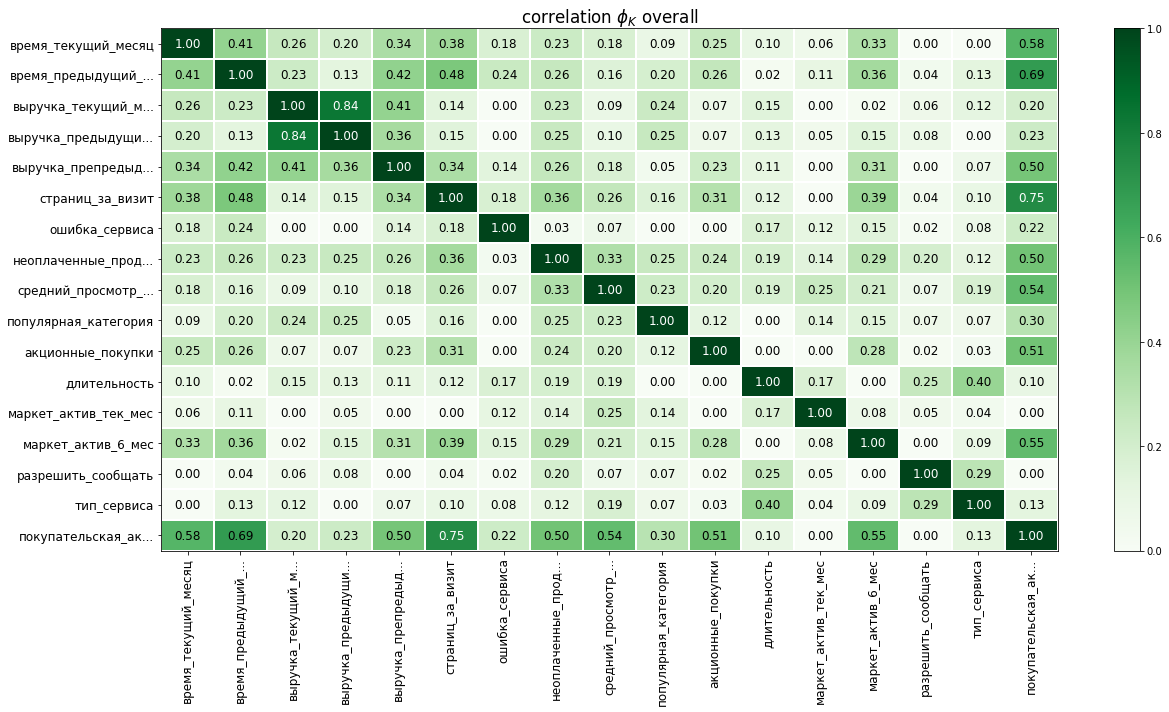

In [22]:
draw_phik_matrix(df, ' overall')

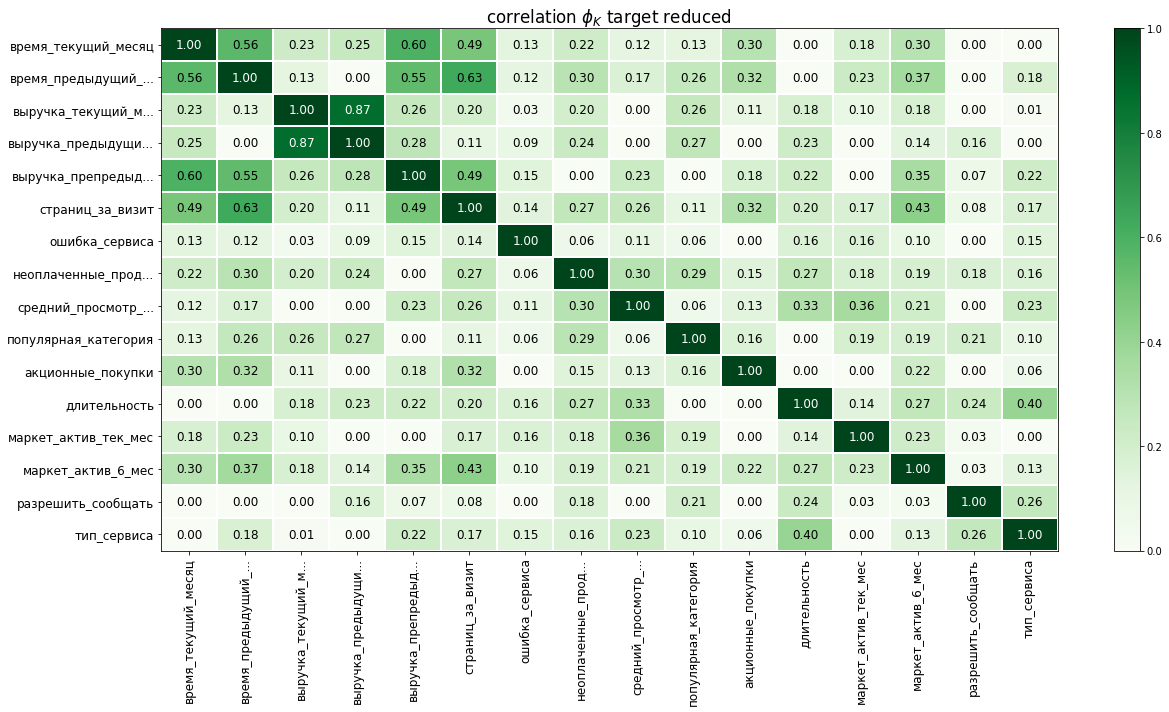

In [23]:
draw_phik_matrix(df.query('покупательская_активность == "Снизилась"').drop('покупательская_активность', axis=1), \
                ' target reduced')

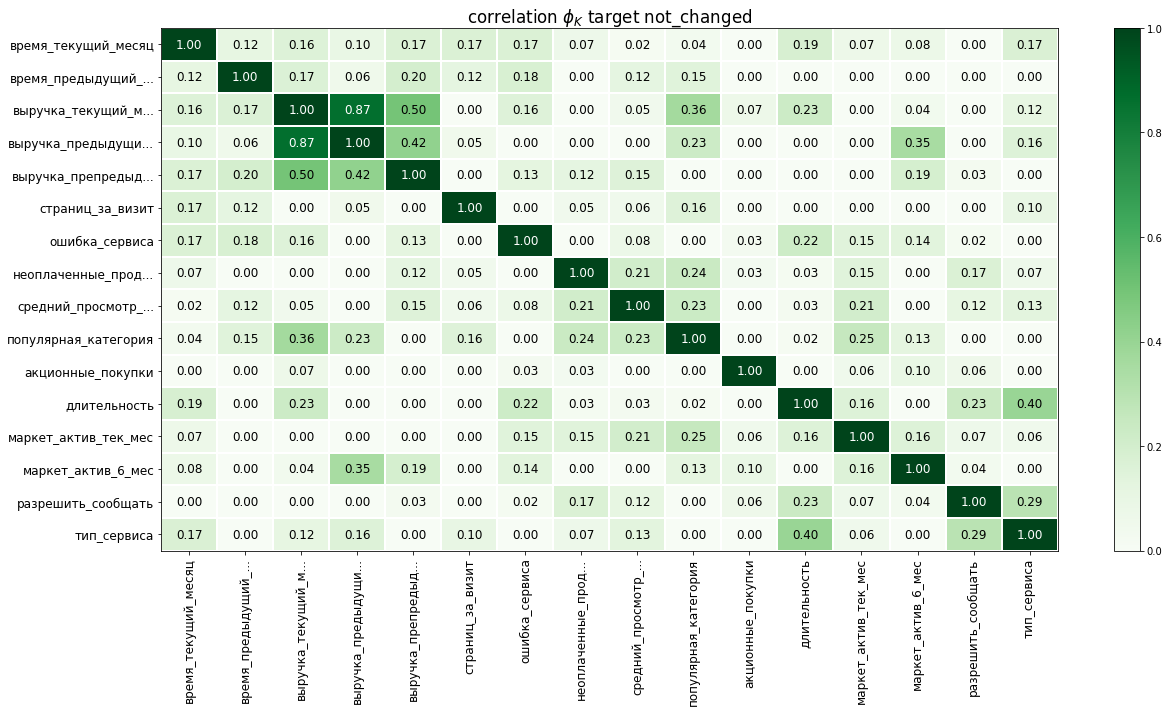

In [24]:
draw_phik_matrix(df.query('покупательская_активность == "Прежний уровень"').drop('покупательская_активность', axis=1), \
                ' target not_changed')

### Промежуточный вывод

Целевой признак `покупательская_активность` коррелирует 
- с числовыми признаками: 
    - `страниц_за_визит`- коэффициент корреляции: 0,75 - высокая связь;
    - `время_текущий_месяц`, `время_предыдущий_месяц`, `неоплаченные_продукты_штук_квартал`, `средний_просмотр_категорий_за_визит`, `акционные_покупки`, `маркет_актив_6_мес`, `выручка_препредыдущий_месяц` - коэффициенты корреляции: 0,58, 0,69, 0,50, 0,54, 0,51, 0,55, 0,5   - заметная связь;
    - `выручка_предыдущий_месяц`, `ошибка_сервиса`, `выручка_текущий_месяц` - коэффициенты корреляции: 0,23, 0,22, 0,2 - незначительная связь;
- категориальными признаками:
    - `популярная категория`  - коэффициент корреляции: 0,30  - умеренная связь;
    - `тип сервиса` -  - коэффициент корреляции: 0,13 - незначительная связь.
    
Отсутствует связь с признаками: `длительность`, `маркет_актив_тек_мес`, `разрешить сообщать`.

 
Мультиколлинеарности между признаками нет, самый высокий коэффициент корреляции 0,84 между выручкой в текущем и предыдущем месяцах.


Также для выявления `взаимосвязи между входными признаками в зависимости от значения целевого признака` (активность снизилась/активность прежняя) построены отдельные корреляционные матрицы.

В группе, где определено `снижение покупательской активности`, выявлены следующие коэффициенты корреляции от 0.5 и выше (как минимум заметная связь) между признаками:

- фи-коэф-т *0.84* выручка предыдущий месяц / выручка текущий месяц;
- фи-коэф-т *0.48* время предыдущий месяц / страниц за визит;
- фи-коэф-т *0.56* время текущий месяц / время предыдущий месяц;
- фи-коэф-т *0.6* время текущий месяц / выручка препредыдущий месяц;
- фи-коэф-т *0.49* время текущий месяц / страниц за визит;
- фи-коэф-т *0.55* время предыдущий месяц / выручка препредыдущий месяц;
- фи-коэф-т *0.63* время предыдущий месяц / страниц за визит;
- фи-коэф-т *0.87* выручка предыдущий месяц / выручка текущий месяц;

Таким образом, внутри данной группы таргета наибольшее влияние оказывают следующие признаки:
- время, которое покупатель провёл на сайте в текущем и предыдущем месяцах;
- сумма выручки, которую клиент потратил при взаимодействии с сайтом за последние 3 месяца;
- количество страниц за визит, которые просмотрел покупатель. 


В группе, где `покупательская активность не меняется`, выявлены следующие коэффициенты корреляции от 0.5 и выше (как минимум заметная связь) между признаками:

- фи-коэф-т *0.87* выручка предыдущий месяц / выручка текущий месяц;
- фи-коэф-т *0.5* выручка препредыдущий месяц / выручка текущий месяц;
- фи-коэф-т *0.42* выручка препредыдущий месяц / выручка предыдущий месяц;

Таким образом, внутри данной группы таргета наибольшее влияние оказывает сумма выручки, которую клиент потратил при взаимодействии с сайтом за последние 3 месяца.


## Использование пайплайнов

Для выбора лучшей модели будет использован общий пайплайн и инструмент подбора гиперпараметров.

Для выбора подходящей метрики для оценки лучшей модели посмотрим соотношение категорий внутри целевого признака: 

In [25]:
df['покупательская_активность'].value_counts()

Прежний уровень    802
Снизилась          495
Name: покупательская_активность, dtype: int64

Количество клиентов, определенных в группу "Прежний уровень", на 63 % превышает количество клиентов в группе "Снизилась", поэтому для оценки качества модели вне зависимости от выбранного порога вероятности выбрана метрика `roc_auc_score`.

In [26]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

df = df.reset_index()

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['покупательская_активность', 'id'], axis=1),
    df['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['покупательская_активность'])

X_train.shape, X_test.shape

# Кодируем целевой признак в бинарный числовой:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес',\
 'маркет_актив_тек_мес',\
 'длительность',\
 'акционные_покупки',\
 'средний_просмотр_категорий_за_визит',\
 'неоплаченные_продукты_штук_квартал',\
 'ошибка_сервиса',\
 'страниц_за_визит',\
 'выручка_препредыдущий_месяц',\
 'выручка_предыдущий_месяц',\
 'выручка_текущий_месяц',\
 'время_предыдущий_месяц',\
 'время_текущий_месяц']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)) 
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[['стандарт', 'премиум']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)



# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', RobustScaler(), num_columns)
    ], 
    remainder='passthrough'
)


# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    # словарь для модели SVM() 
    {
        'models': [SVC(
            random_state=RANDOM_STATE, 
            probability=True)], 
        'models__kernel': ['rbf', 'poly'],            
        'models__degree': range(3,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']      
    }
]


gs = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=RANDOM_STATE,
    n_jobs=-1
)

gs.fit(X_train, y_train)
pred = gs.predict_proba(X_test)

print('Размерность тренировочной выборки: ', X_train.shape, y_train.shape)
print('Размерность тестовой выборки: ', X_test.shape, y_test.shape, '\n\n')

print('Лучшая модель и её параметры:\n\n', gs.best_params_, '\n\n')
print ('Метрика лучшей модели на тренировочной выборке:', gs.best_score_, '\n\n')

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, pred[:, 1]):.5f}', '\n\n')

display('Рейтинг топ-5 моделей:',pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score').head(5))


Размерность тренировочной выборки:  (972, 16) (972,)
Размерность тестовой выборки:  (325, 16) (325,) 


Лучшая модель и её параметры:

 {'models': SVC(probability=True, random_state=42), 'models__degree': 3, 'models__kernel': 'rbf', 'preprocessor__num': RobustScaler()} 


Метрика лучшей модели на тренировочной выборке: 0.9149398530762168 


Метрика ROC-AUC на тестовой выборке: 0.92136 




'Рейтинг топ-5 моделей:'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__max_depth,param_models__max_features,param_preprocessor__num,param_models__n_neighbors,param_models__C,...,param_models__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
66,0.104912,0.009082,0.014809,0.002802,"SVC(probability=True, random_state=42)",NaN,NaN,RobustScaler(),NaN,NaN,...,rbf,"{'models': SVC(probability=True, random_state=...",0.912665,0.917778,0.938176,0.921509,0.884572,0.914940,0.017427,1
74,0.114189,0.009784,0.015766,0.003095,"SVC(probability=True, random_state=42)",NaN,NaN,RobustScaler(),NaN,NaN,...,rbf,"{'models': SVC(probability=True, random_state=...",0.912665,0.917778,0.938176,0.921509,0.884572,0.914940,0.017427,1
82,0.105414,0.012435,0.014877,0.001985,"SVC(probability=True, random_state=42)",NaN,NaN,RobustScaler(),NaN,NaN,...,rbf,"{'models': SVC(probability=True, random_state=...",0.912665,0.917778,0.938176,0.921509,0.884572,0.914940,0.017427,1
80,0.101921,0.007824,0.016202,0.002514,"SVC(probability=True, random_state=42)",NaN,NaN,StandardScaler(),NaN,NaN,...,rbf,"{'models': SVC(probability=True, random_state=...",0.921934,0.913333,0.934009,0.912838,0.891554,0.914734,0.013901,4
72,0.098060,0.000917,0.013874,0.000817,"SVC(probability=True, random_state=42)",NaN,NaN,StandardScaler(),NaN,NaN,...,rbf,"{'models': SVC(probability=True, random_state=...",0.921934,0.913333,0.934009,0.912838,0.891554,0.914734,0.013901,4


### Промежуточный вывод
 
- Лучшая модель - метод опорных векторов (SVC), с ядром  радиальной базисной функции. 
- Метрика roc_auc_score на кросс-валидации - 0.915, на тестовой выборке - 0.921. Это среднее качество модели при разных порогах вероятности.
- Метод масштабирования - RobustScaler.

## Анализ важности признаков

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

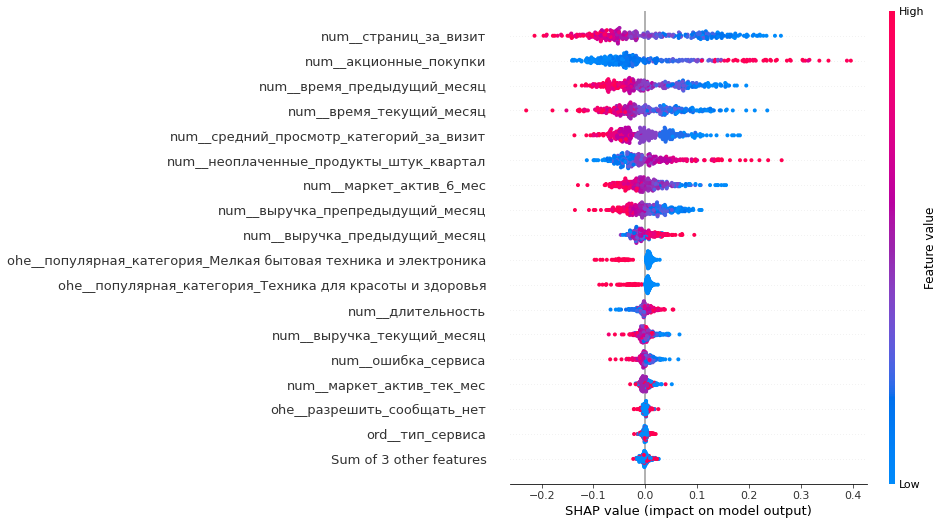

In [27]:
best_model = gs.best_estimator_

X_train_transformed = best_model.named_steps['preprocessor'].fit_transform(X_train)
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)

X_train_df = pd.DataFrame(
    X_train_transformed,
    columns=best_model.named_steps['preprocessor'].get_feature_names_out()
)

X_test_df = pd.DataFrame(
    X_test_transformed,
    columns=best_model.named_steps['preprocessor'].get_feature_names_out()
)

explainer = shap.SamplingExplainer(
    lambda x: best_model.named_steps['models'].predict_proba(x)[:,1],
    X_train_transformed)

shap_values = explainer.shap_values(X_test_df)

shap.plots.beeswarm(explainer(X_test_df), max_display=18)  

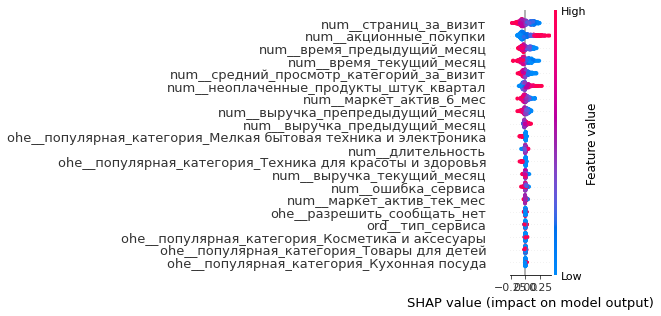

In [28]:
shap.summary_plot(shap_values, X_test_df, plot_size=0.15)

### Промежуточный вывод
 

- Влияние входных признаков на целевой в порядке убывания средних SHAP‑значений:
    - `среднее количество страниц`, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
    Чем больше страниц просмотрел покупатель, тем выше вероятность отнесения покупателя к классу 0 , т.е. покупательская активность не изменится.
    - `среднемесячная доля покупок по акции` от общего числа покупок за последние 6 месяцев;
    Если у покупателя низкая доля акционных покупок, вероятно покупательская активность не изменится.
    Также выделяется отдельный сегмент клиентов, у которых высокая доля покупок по акции, в этом сегмент высока вероятность снижения покупательской активности.     
    - `время, проведённое на сайте в текущем месяце`;
    - `время, проведённое на сайте в прошлом месяце`;
    - `сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца`;
    Чем выше значение в каждом из этих признаков, тем более высока вероятность отнесения покупателя к классу 0 , т.е. покупательская активность не изменится.    
    - число неоплаченных товаров в корзине за последние 3 месяца;
    Наблюдения сгуппированы более плотно по сравнению с долей акционных покупок, но также просматривается факт, что более высокое число  неоплаченных товаров в корзине, предполагает снижение покупательской активности.
    - среднемесячное значение маркетинговых коммуникаций компании за последние 6 месяцев;
    - сумма выручки за позапрошлый период.
    Чем выше значение в каждом из этих признаков, тем более высока вероятность отнесения покупателя к классу 0 , т.е. покупательская активность не изменится.      
    - сумма выручки за прошлый период.
    Если клиент совершал покупки в прошлом месяце есть вероятность, что его покупательская активность снизится, т.е такие клиенты совершают покупки нерегулярно, например, в периоды проведения акций. 


- Признаки мало значимы для модели, т.е. не оказывают влияние на снижение покупательской активности:
    - `разрешить сообщать`;    
    - `популярные категории` : `Косметика и аксессуары`, `Товары для детей`, `Кухонная посуда`.


## Сегментация покупателей

Отобрав из выборки постоянных покупателей, совершивших покупки в каждом из трёх последних месяцев, и построив модель предсказания вероятности снижения покупательской активности клиента, промаркируем  уровень финансовой активности постоянных покупателей:


In [29]:
# предсказание
best_model.named_steps['models'].fit(X_train_df, y_train)
pred_train = best_model.named_steps['models'].predict(X_train_df)
pred_test = best_model.named_steps['models'].predict(X_test_df)

X_train['pred_train'] = pred_train
X_test['pred_test'] = pred_test

In [30]:
# запись предсказаний в итоговый датафрейм
df = df.join(X_train['pred_train']).join(X_test['pred_test'])
df.loc[(df.pred_train.isna() == True), 'pred_train'] = \
df[df['pred_test'].isna() == False]['pred_test']
df = df.rename(columns={'pred_train': 'покупательская_активность_предсказанная'})
df = df.drop('pred_test', axis=1)

# перевод  бинарного признака в категориальный текстовый
df['покупательская_активность_предсказанная'] = \
df['покупательская_активность_предсказанная'].apply( lambda x: 'Прежний уровень' if x==0 else 'Снизилась' )

df['покупательская_активность'] = \
df['покупательская_активность'].apply( lambda x: 'Прежний уровень' if x==0 else 'Снизилась' )

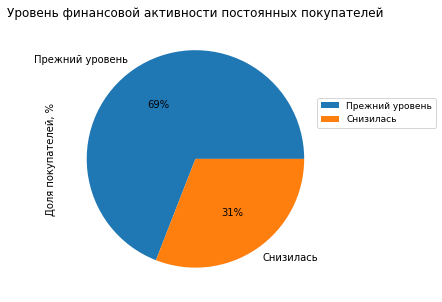

In [31]:
ax = (df
      .groupby('покупательская_активность_предсказанная').agg(cnt=('покупательская_активность_предсказанная', 'count'))
      .plot.pie(y='cnt', title='Уровень финансовой активности постоянных покупателей',
                autopct='%1.0f%%', figsize=(5, 5)))
ax.set_ylabel('Доля покупателей, %')
ax.legend(loc=5, bbox_to_anchor=(1.4, 0.67), fontsize=9)

plt.show()


Ожидается снижение покупательской активности в следующие 3 месяца у 31 % постоянных покупателей.


Для формирования способов увеличения покупательской активности выделим сегмент покупателей: *Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью*.

Добавим в датафрейм информацию о среднемесячной прибыли покупателя за последние 3 месяца и отрисуем график распределения прибыльности внутри сегмента.

In [32]:
df = df.set_index('id').join(profit_month.set_index('id'))


Text(0.5, 0.98, 'Среднемесячная прибыль покупателя за последние 3 месяца')

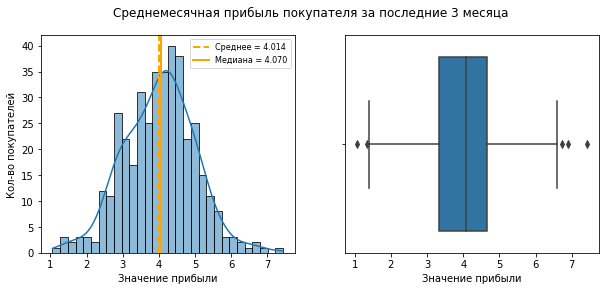

In [33]:
dataframe = df[df['покупательская_активность_предсказанная'] == 'Снизилась']
mean_value = df[df['покупательская_активность_предсказанная'] == 'Снизилась']['прибыль'].mean()
median_value = df[df['покупательская_активность_предсказанная'] == 'Снизилась']['прибыль'].median()
    
    
fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (10,4))
    
sns.histplot(data = dataframe, x = dataframe['прибыль'], ax=axs[0], kde=True, bins = 30, legend=True)
axs[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(mean_value))
axs[0].axvline(median_value, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Медиана = {:.3f}'.format(median_value))
axs[0].set_xlabel('Значение прибыли')
axs[0].set_ylabel('Кол-во покупателей')
axs[0].legend(fontsize="8")

sns.boxplot(data = dataframe, x = dataframe['прибыль'], ax=axs[1])
axs[1].set_xlabel('Значение прибыли')
fig.suptitle('Среднемесячная прибыль покупателя за последние 3 месяца')    
 

В среднем за последние 3 месяца покупатель приносит прибыль, равную 4.

Рассмотрим распределение выбранного сегмента клиентов в разрезе групп признаков согласно диаграммы Исикавы и сравним с показателями этого же сегмента клиентов, у которых прогнозируемая покупательская активность не менялась.


Вспомогательные функции для отрисовки графиков ниже.
        

In [34]:
def pie_plot(n):
    
    df_profit_over_4 = df.query('прибыль > 4')

    for i, col in enumerate(n):
    
        plt.figure(i)
    
        fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize=(10, 10))

        dataframe = (df_profit_over_4.query('покупательская_активность_предсказанная == "Снизилась"')
                     .groupby(col)
                     .agg(cnt=('прибыль', 'count')))
        (dataframe
         .plot.pie(y='cnt', title=col[0].upper() + col[1:].lower() + ' \n(активность снизилась)',
                   autopct='%1.0f%%', ax=axs[0], labels=None))
        axs[0].set_ylabel('Доля покупателей, %')

        if isinstance((dataframe.index.to_list())[0], int) == True:
            anchor_value = 1.2
        elif col == 'популярная_категория':
            anchor_value = 1.9
        else:    
            anchor_value = 1.2 
    
        labels = dataframe.reset_index()[col].unique()
        axs[0].legend(labels, loc=5, bbox_to_anchor=(anchor_value, .75), fontsize=7.5)
        
        fig.tight_layout(pad=1)

        dataframe = (df_profit_over_4.query('покупательская_активность_предсказанная != "Снизилась"')
                     .groupby(col)
                     .agg(cnt=('прибыль', 'count')))
        (dataframe
         .plot.pie(y='cnt', title=col[0].upper() + col[1:].lower() + '\n (активность прежняя)',
                            autopct='%1.0f%%', ax=axs[1], labels=None))
        axs[1].set_ylabel('Доля покупателей, %')
        axs[1].legend(labels, loc=5, bbox_to_anchor=(anchor_value, .75), fontsize=7.5)
        
    
    plt.show()    
    
     
def scatter_plot(n):
    sns.pairplot(data=df, x_vars=n, y_vars='прибыль', hue='покупательская_активность_предсказанная', height=4, kind = "reg", plot_kws={'scatter_kws': {'alpha': 0.4}})


**Коммуникация с клиентом**

Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Тип сервиса;
- Разрешение на сообщения;
- Маркетинг 6 месяцев;
- Маркетинг текущего месяца;
- Длительность истории с клиентом;


<Figure size 432x288 with 0 Axes>

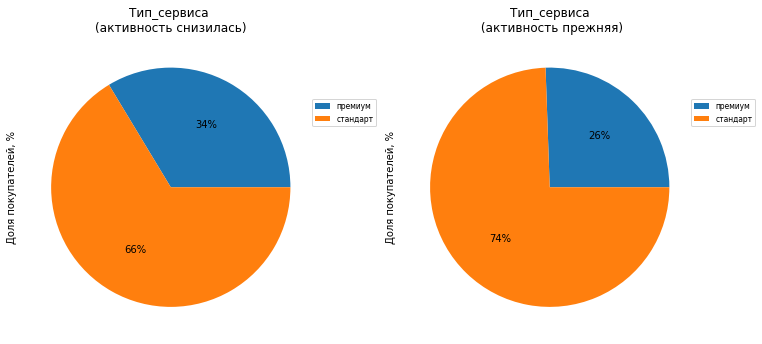

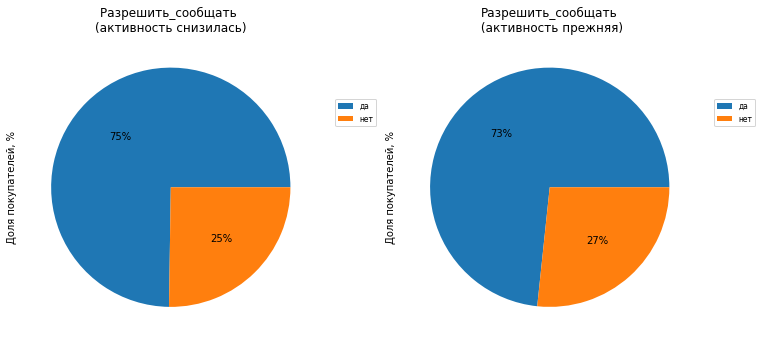

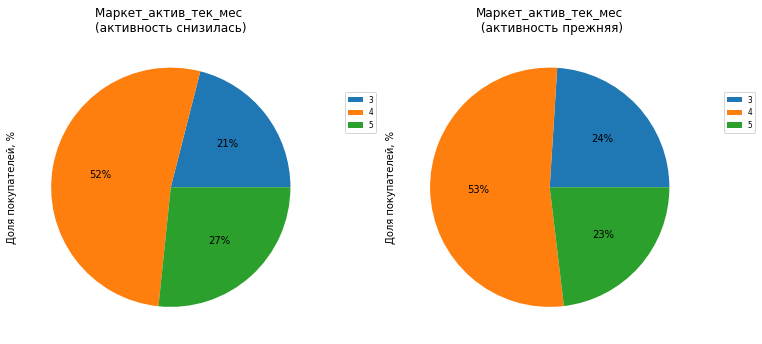

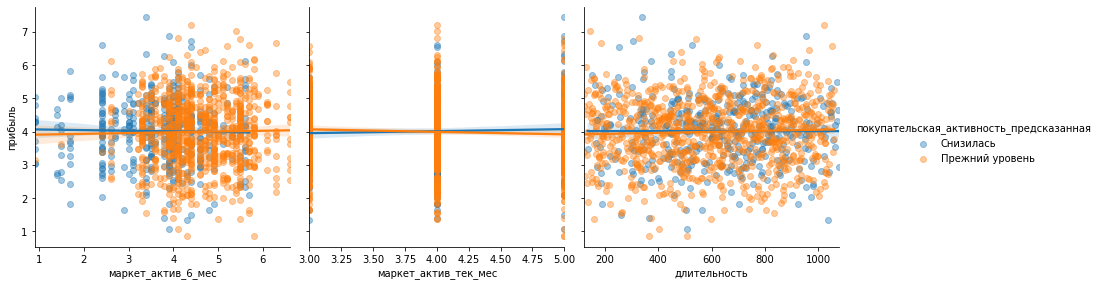

In [35]:
pie_plot(['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_тек_мес'])
scatter_plot(['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность'])


На круговых диаграммах смотрим разницу в распределении признаков внутри группы с высокой прибыльностью (выше 4): отдельно по тем, по кому снизилась активность и отдельно у кого активность осталась на прежнем уровне. 
На диаграммах рассеяния смотрим разницу в распределении признаков вне зависимости от прибыльности.

- В группе покупателей, где предсказано снижение активности, доля с премиум сервисом на 8 % выше.
    - Необходимо обратить внимание: какие недавние изменения вносились в условия программы в премиум сервисе, возможно бонусная система стала менее привлекательной.

- В текущем месяце заметно небольшое увеличение в количестве коммуникаций в группе покупателей, где предсказано снижение активности, однако, среднее количество коммуникаций, приходившиееся на клиента за последние 6 месяцев, в этой группе ниже.      
    - Необходимо провести анализ, по каким критериям отбирались клиенты для отправки коммуникаций, и почему клиенты из выбранного сегмента реже попадали в выборки для коммуникаций. После анализа необходимо увеличить количество коммуникаций для сегмента: возможно запустить кампанию по ротации разных видов и типов коммуникаций и затем замерить конверсию, какой вид коммуникации приносит больший отлик.

**Продуктовое поведение**

Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Наиболее частая категория продукта в заказе;
- Среднее число просматриваемых категорий продуктов за визит;
- Число неоплаченных продуктов в корзине за последние 3 месяца;


<Figure size 432x288 with 0 Axes>

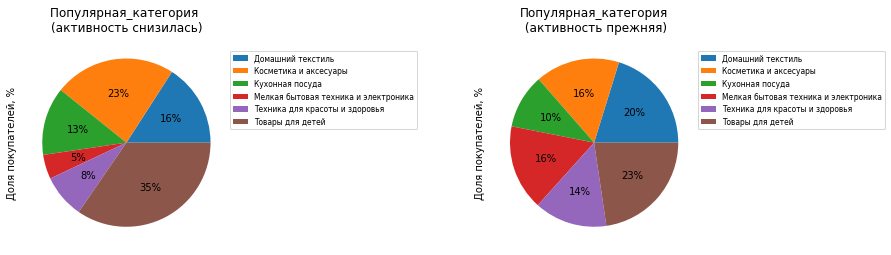

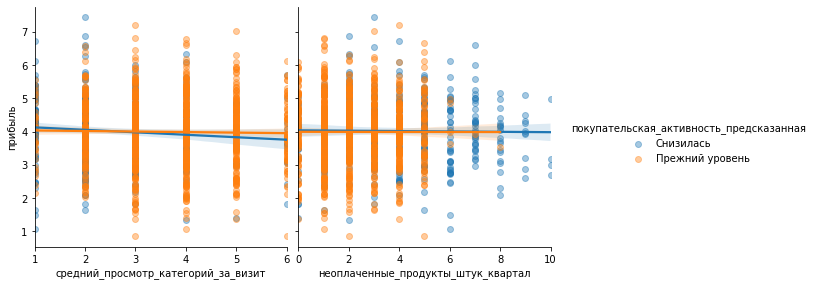

In [36]:
pie_plot(['популярная_категория'])
scatter_plot(['средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал'])

- Заметна разница в распределении популярной категории между группой покупателей, где предсказано снижение активности, и где активность вероятно не изменится.
    - Самой популярной категорией в первой группе является "Товары для детей" - 35%, наименее популярной - "Мелкая бытовая техника и электроника".
    - Еще одной категорией, которая занимает большую долю, и где предсказано снижение покупательской активности, является "Косметика и аксессуары". 
    Для привлечения покупателя можно предложить скидку на следующую покупку, а также отправить клиенту коммуникацию, где рассказать о новинках в релевантной для клиента подкатегории.

- Для увеличения количества категорий, просмотренных покупателем за визит, нужно сформировать подборку популярных сопутствующих товаров к тем, которые клиент покупал или интересовался.

- В группе покупателей, где предсказано снижение активности, количество брошенных продуктов в корзине выше.
    - Необходимо направлять клиенту, если он не завершил заказ, на следующий день рассылку-напоминание завершить заказ. Также возможен вариант, что пока клиент размышлял над тем, заказывать товар или нет, выбранный товар закончился. В таком случае стоит предложить клиенту аналогичные товары из наличия.


**Финансовое поведение**

Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Разница в выручке предыдущего и предпредыдущего месяца;
- Разница в выручке текущего и предыдущего месяца;
- Выручка в текущем месяцев;



In [37]:
df['разница_выручки_предыдущего_предпредыдущего_месяцев'] = \
df['выручка_предыдущий_месяц'] - df['выручка_препредыдущий_месяц']

df['разница_выручки_текущего_предыдущего_месяцев'] = \
df['выручка_текущий_месяц'] - df['выручка_предыдущий_месяц']

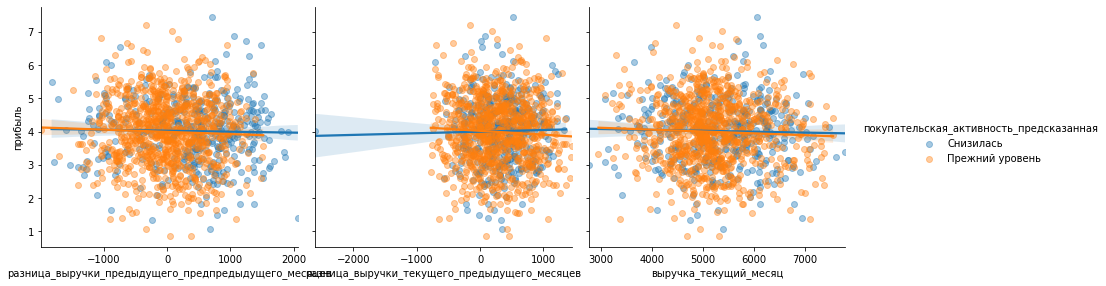

In [38]:
scatter_plot(['разница_выручки_предыдущего_предпредыдущего_месяцев', \
              'разница_выручки_текущего_предыдущего_месяцев', \
              'выручка_текущий_месяц'])

<Figure size 432x288 with 0 Axes>

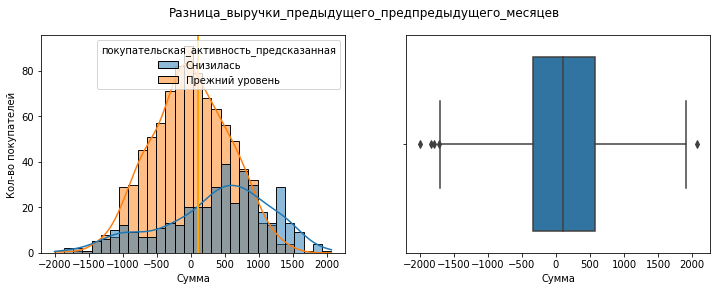

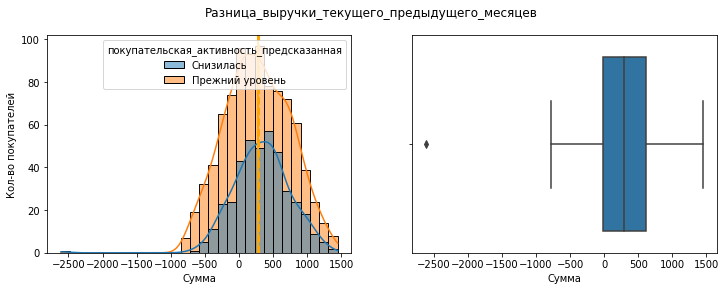

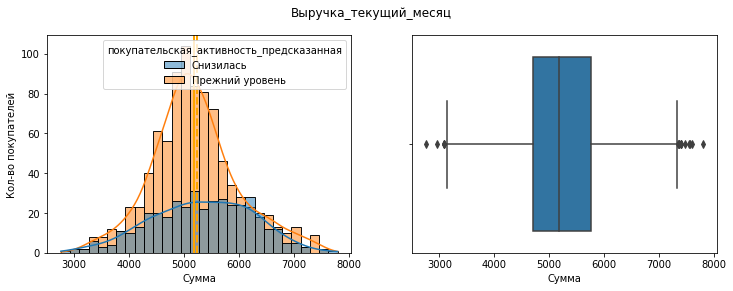

In [39]:
dataframe = df

for i, col in enumerate(dataframe[['разница_выручки_предыдущего_предпредыдущего_месяцев', \
              'разница_выручки_текущего_предыдущего_месяцев', \
              'выручка_текущий_месяц']]):
    
    mean_value = dataframe[col].mean()
    median_value = dataframe[col].median()
    
    plt.figure(i)
    
    fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (12,4))
    
    sns.histplot(data = dataframe, x = dataframe[col], ax=axs[0], kde=True, bins = 30, hue=dataframe['покупательская_активность_предсказанная'], legend=True)
    axs[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(mean_value))
    axs[0].axvline(median_value, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Медиана = {:.3f}'.format(median_value))
    axs[0].set_xlabel('Сумма')
    axs[0].set_ylabel('Кол-во покупателей')

    sns.boxplot(data = dataframe, x = dataframe[col], ax=axs[1])
    axs[1].set_xlabel('Сумма')
    fig.suptitle(col[0].upper() + col[1:].lower())    
    

Разброс в разнице выручки от месяца к месяцу больше за прошлые периоды.

**Поведение на сайте**

Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
- Время на сайте за прошлый год;
    - *По данному признаку нет данных*.

- Время на сайте за предыдущий месяц;
- Время на сайте за текущий месяц;
- Минут за визит;
    - *Введем новый столбец, посчитав среднее арифмитическое значение минут, проведённых на сайте за последние 2 месяца.*

- Число страниц за визит;
- Сбои сайта.

In [40]:
df['минут_за_визит'] = \
(df['время_предыдущий_месяц'] + df['время_текущий_месяц']) / 2


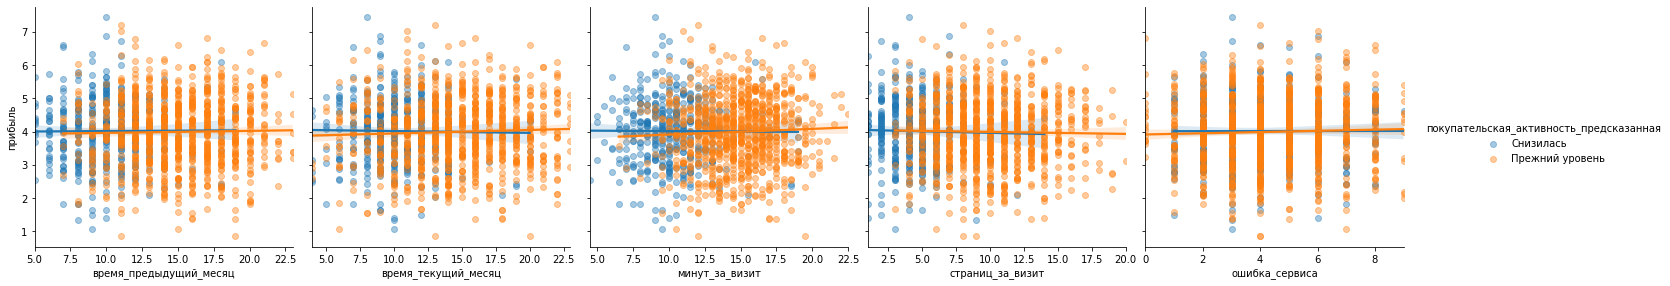

In [41]:
scatter_plot(['время_предыдущий_месяц', 'время_текущий_месяц', 'минут_за_визит', 'страниц_за_визит', 'ошибка_сервиса' ])

В группе покупателей, где предсказано снижение активности, количество времени, проведенного на сайте и количество просмотренных страниц ниже.
   - Возможно клиент искал определенный товар, но не нашел. 
       - Стоит провести дополнительный анализ популярных запросов товаров клиентов, чтобы расширить ассортимент.
       - Показывать клиенту подборку популярных товаров в интересующих его категориях.

### Промежуточный вывод
 
- На основании лучшей модели предсказан уровень финансовой активности постоянных покупателей: у 31 % ожидается снижение в следующие 3 месяца.


- Для дальнейшего анализа выбран сегмент покупателей: *Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью*.


- Рассмотрено распределение выбранного сегмента клиентов в разрезе групп признаков согласно *диаграммы Исикавы*.
    - *Коммуникация с клиентом* :
        - доля клиентов с премиум сервисом на 8 % выше в группа клиентов с высокой вероятностью снижения покупательской активности.
        - В текущем месяце заметно небольшое увеличение в количестве коммуникаций в группе покупателей, где предсказано снижение активности, однако, среднее количество коммуникаций, приходившиееся на клиента за последние 6 месяцев, в этой группе ниже.       

    - *Продуктовое поведение* :
      - Самой популярной категорией выбранного сегмента является "Товары для детей". 
       - Еще одной категорией, которая занимает большую долю, и где предсказано снижение покупательской активности, является "Косметика и аксессуары". 
       - В группе покупателей, где предсказано снижение активности, количество неоплаченных продуктов в корзине выше.

    - *Финансовое поведение* :
        - Разброс в разнице выручки от месяца к месяцу больше за прошлые периоды.

    - *Поведение на сайте* :
        - В группе покупателей, где предсказано снижение активности, количество времени, проведенного на сайте и количество просмотренных страниц ниже.
    
Предложения по увеличению покупательской активности в выбранном сегменте:        
   - проанализировать недавние изменения в условия программы в премиум сервисе, возможно бонусная система стала менее привлекательной.     
   - выделить критерии отбора клиентов для отправки коммуникаций, и выяснить почему клиенты из выбранного сегмента реже попадали в выборки для коммуникаций. После анализа необходимо увеличить количество коммуникаций для сегмента: возможно запустить кампанию по ротации разных видов и типов коммуникаций и затем замерить конверсию, какой вид коммуникации приносит больший отлик.
   - Для клиентов из категорий товаров с длинным жизненным циклом необходимо дополнительно предложить бонус на следующую покупку, чтобы покупатель вернулся.
   - Для клиентов из других популярных категорий отправить коммуникацию, где рассказать о новинках в релевантной подкатегории.
   - В целях увеличения количества категорий, просмотренных покупателем за визит, нужно сформировать подборку популярных сопутствующих товаров к тем, которые клиент покупал или интересовался. 
   - В целях увеличения времени, проведенного на сайте, добавить описание товаров, там, где его нет, и качественные фото товаров. 
   - Направлять клиенту на следующий день, если он не завершил заказ, напоминание завершить заказ. Также возможен вариант, что пока клиент размышлял над тем, заказывать товар или нет, выбранный товар закончился. В таком случае стоит предложить клиенту аналогичные товары из наличия.
   - Инициировать дополнительный анализ популярных запросов товаров клиентов, чтобы расширить ассортимент.
   - Показывать клиенту подборку популярных товаров в интересующих его категориях.                

## Общий вывод

`Цель исследования`: на основе анализа данных и бизнес-моделирования разработать персонализированные предложения для увеличения активности и снижения оттока постоянных покупателей.

`Исходные данные` находятся в нескольких таблицах и содержат данные: 
- о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

`Предобработка данных` включает пройденные этапы:
- Запись датасета в переменные;
- Преобразование названий столбцов в "змеиный" регистр.
- Явные дубликаты не обнаружены.
- Обработаны неявные дубликаты в столбце 'тип_сервиса' датафрейма "market" и колонке 'тип_сервиса' в датафрейме time.
- Обнаружено, в датафрейме с данными о выручке содержатся данные за 3 месяца, включая позапрошлый период, в датафрейме о времени на сайте содержатся данные за 2 месяца: текущий и прошлый.
- В целях экономии памяти преобразованы столбцы с типом float64 во float32, с типом int64 в int32.

`Исследовательский анализ данных` выявил:

- В среднем на покупателя приходится 4,2 коммуникации  за последние 6 месяцев.
- Кол-во дней с момента регистрации среднем 606.
- Выделяется сегмент клиентов с высокой долей покупок по акции - от 0,45.
- За визит покупатель просматривает в среднем 3 категории и 8 страниц.
- В среднем 3 неоплаченных товаров в корзине.
- Среднее кол-во сбоев, коснувшееся клиентов, - 4 .
- Распределение покупательской активности: 62 на 38 %% в пользу прежнего уровня.
- Тип сервиса: 71% - стандарт, 29 % - премиум.
- Есть разрешение коммуницировать у 74 % покупателей.
- Самая популярная категория - "товары для детей", наименее популярная - "кухонная посуда".
- В среднем выручка в текущем месяце равна 5180, в прошлом месяце - 5005, в предпредыдущем месяце - 4809.
- Среднее количество минут за период, которое покупатель провёл на сайте в течение периода - 13.
- Средняя среднемесячная прибыль покупателя за последние 3 месяца - 4.

- Для покупателя, у которго сумма покупок в текущем месяце превышает 100 тыс., произведена замена на среднее значение выручки за прошлые периоды. Т.к. подобная большая сумма покупок - единственная в датасете, т.е. не характерна для определенного сегмента покупателей, будет верным заменить значение, чтобы оно не влияло на работу модели.

- В целях моделирования:
    - Для покупателя, у которго сумма покупок в текущем месяце превышает 100 тыс., произведена замена на среднее значение выручки за прошлые периоды. Т.к. подобная большая сумма покупок - единственная в датасете, т.е. не характерна для определенного сегмента покупателей, будет верным заменить значение, чтобы оно не влияло на работу модели.
    - Для данных о выручке и времени на сайте в итоговой таблице созданы отдельные столбцы для каждого периода.
    - В итоговый датафрейм вошли клиенты с покупательской активностью не менее трёх месяцев в соответствии с условием задачи.


`Корреляционный анализ данных` выявил:
Целевой признак `покупательская_активность` коррелирует 
- с числовыми признаками: 
    - `страниц_за_визит`- коэффициент корреляции: 0,75 - высокая связь;
    - `время_текущий_месяц`, `время_предыдущий_месяц`, `неоплаченные_продукты_штук_квартал`, `средний_просмотр_категорий_за_визит`, `акционные_покупки`, `маркет_актив_6_мес`, `выручка_препредыдущий_месяц` - коэффициенты корреляции: 0,58, 0,69, 0,50, 0,54, 0,51, 0,55, 0,5   - заметная связь;
    - `выручка_предыдущий_месяц`, `ошибка_сервиса`, `выручка_текущий_месяц` - коэффициенты корреляции: 0,23, 0,22, 0,2 - незначительная связь;
- категориальными признаками:
    - `популярная категория`  - коэффициент корреляции: 0,30  - умеренная связь;
    - `тип сервиса` -  - коэффициент корреляции: 0,13 - незначительная связь.
    
Отсутствует связь с признаками: `длительность`, `маркет_актив_тек_мес`, `разрешить сообщать`.
 
Мультиколлинеарности между признаками нет. 

Также для выявления `взаимосвязи между входными признаками в зависимости от значения целевого признака` (активность снизилась/активность прежняя) построены отдельные корреляционные матрицы.

В группе, где определено `снижение покупательской активности`, выявлены следующие коэффициенты корреляции от 0.5 и выше (как минимум заметная связь) между признаками:

- фи-коэф-т *0.84* выручка предыдущий месяц / выручка текущий месяц;
- фи-коэф-т *0.48* время предыдущий месяц / страниц за визит;
- фи-коэф-т *0.56* время текущий месяц / время предыдущий месяц;
- фи-коэф-т *0.6* время текущий месяц / выручка препредыдущий месяц;
- фи-коэф-т *0.49* время текущий месяц / страниц за визит;
- фи-коэф-т *0.55* время предыдущий месяц / выручка препредыдущий месяц;
- фи-коэф-т *0.63* время предыдущий месяц / страниц за визит;
- фи-коэф-т *0.87* выручка предыдущий месяц / выручка текущий месяц;

Таким образом, внутри данной группы таргета наибольшее влияние оказывают следующие признаки:
- время, которое покупатель провёл на сайте в текущем и предыдущем месяцах;
- сумма выручки, которую клиент потратил при взаимодействии с сайтом за последние 3 месяца;
- количество страниц за визит, которые просмотрел покупатель. 


В группе, где `покупательская активность не меняется`, выявлены следующие коэффициенты корреляции от 0.5 и выше (как минимум заметная связь) между признаками:

- фи-коэф-т *0.87* выручка предыдущий месяц / выручка текущий месяц;
- фи-коэф-т *0.5* выручка препредыдущий месяц / выручка текущий месяц;
- фи-коэф-т *0.42* выручка препредыдущий месяц / выручка предыдущий месяц;

Таким образом, внутри данной группы таргета наибольшее влияние оказывает сумма выручки, которую клиент потратил при взаимодействии с сайтом за последние 3 месяца.

`Для поиска лучшей модели`:
- использован один общий пайплайн для 4 моделей: *Метод K-ближайших соседей*, *Классификатор дерева решений*, *Логистическая регрессия*, *Метод опорных векторов*
- использован инструмент подбора гиперпараметров по сетке: кодирование категориальных признаков с помощью OneHotEncoder, категоримальных порядковых - OrdinalEncoder, для масштабирования числовых признаков - StandardScaler(), MinMaxScaler(), RobustScaler().
- для оценки качества вне зависимости от выбранного порога вероятности выбрана метрика *roc_auc_score*.

`Лучшая модель и параметры`: 
- метод опорных векторов (SVC), с ядром радиальной базисной функции rbf.
- Метрика roc_auc_score - 0.915 на кросс-валидации, на тестовой выборке - 0.921 - среднее качество модели при разных порогах вероятности.
- Метод масштабирования - RobustScaler, нечувствительный к выбросам.


`Анализ важности признаков`.
 
- Влияние входных признаков на целевой в порядке убывания средних SHAP‑значений:
    - `среднее количество страниц`, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
    Чем больше страниц просмотрел покупатель, тем выше вероятность отнесения покупателя к классу 0 , т.е. покупательская активность не изменится.
    - `среднемесячная доля покупок по акции` от общего числа покупок за последние 6 месяцев;
    Если у покупателя низкая доля акционных покупок, вероятно покупательская активность не изменится.
    Также выделяется отдельный сегмент клиентов, у которых высокая доля покупок по акции, в этом сегмент высока вероятность снижения покупательской активности.     
    - `время, проведённое на сайте в текущем месяце`;
    - `время, проведённое на сайте в прошлом месяце`;
    - `сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца`;
    Чем выше значение в каждом из этих признаков, тем более высока вероятность отнесения покупателя к классу 0 , т.е. покупательская активность не изменится.    
    - число неоплаченных товаров в корзине за последние 3 месяца;
    Наблюдения сгуппированы более плотно по сравнению с долей акционных покупок, но также просматривается факт, что более высокое число  неоплаченных товаров в корзине, предполагает снижение покупательской активности.
    - среднемесячное значение маркетинговых коммуникаций компании за последние 6 месяцев;
    - сумма выручки за позапрошлый период.
    Чем выше значение в каждом из этих признаков, тем более высока вероятность отнесения покупателя к классу 0 , т.е. покупательская активность не изменится.      
    - сумма выручки за прошлый период.
    Если клиент совершал покупки в прошлом месяце есть вероятность, что его покупательская активность снизится, т.е такие клиенты совершают покупки нерегулярно, например, в периоды проведения акций. 


- Признаки мало значимы для модели, т.е. не оказывают влияние на снижение покупательской активности:
    - `разрешить сообщать`;    
    - `популярные категории` : `Косметика и аксессуары`, `Товары для детей`, `Кухонная посуда`.


Модель показала, что ожидается снижение покупательской активности в следующие 3 месяца у 31 % постоянных покупателей.

`Предложения по увеличению покупательской активности` сегмента *Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью (выше средней, равной 4)*

(214 клиентов):        
   - проанализировать условия программы в премиум сервисе, по результатам анализа провести пилоты в целях улучшения привлекательности пользования сервисом для клиентов.     
   - провалидировать критерии отбора клиентов для отправки коммуникаций на возможные ошибки. 
   - увеличить количество коммуникаций для сегмента: возможно запустить кампанию по ротации разных видов и типов коммуникаций и затем замерить конверсию, какой вид коммуникации приносит больший отлик.
   - Для клиентов из категорий товаров с длинным жизненным циклом необходимо дополнительно предложить бонус на следующую покупку, чтобы покупатель вернулся.
   - Для клиентов из других популярных категорий отправить коммуникацию, где рассказать о новинках в релевантной подкатегории.
   - В целях увеличения количества категорий, просмотренных покупателем за визит, нужно сформировать подборку популярных сопутствующих товаров к тем, которые клиент покупал или интересовался. 
   - Направлять клиенту на следующий день, если он не завершил заказ, напоминание завершить заказ. Также возможен вариант, что пока клиент размышлял над тем, заказывать товар или нет, выбранный товар закончился. В таком случае стоит предложить клиенту аналогичные товары из наличия.
   - Инициировать дополнительный анализ популярных запросов товаров клиентов, чтобы расширить ассортимент.
   - В целях увеличения времени, проведенного на сайте, показывать клиенту подборку популярных товаров в интересующих его категориях. Также добавить описание товаров, там, где его нет, и качественные фото товаров.